![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. The goal of this analysis is to explore what types of films are currently doing the best at the box office and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load and preview data files for ratings and revenue

imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

display(imdb_title_basics_df.head(),
        imdb_title_ratings_df.head(),
        tn_movie_budgets_df.head(),
        bom_movie_gross_df.head())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Merge imdb tables to pair movie titles with their ratings

imdb_df = imdb_title_basics_df.merge(imdb_title_ratings_df, how='right', 
                                     on='tconst')

print("number of rows: ", len(imdb_df))
display(imdb_df.head())

number of rows:  73856


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


In [4]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [5]:
# Fill missing genres with 'None'

imdb_df['genres'].fillna('None', inplace=True)

In [6]:
# Preview financial data

print("number of rows in tn: ", len(tn_movie_budgets_df))
display(tn_movie_budgets_df.head())

number of rows in tn:  5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# Convert release date to show year only as int type

tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str[-4:].astype(int)

In [8]:
# Remove commas from dollar amounts

tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].replace(',', '', regex = True)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].replace(',', '', regex = True)
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].replace(',', '', regex = True)

# Remove $ sign and convert to int type

tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str[1:].astype(int)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str[1:].astype(int)
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str[1:].astype(int)

tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000,760507625,2776345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019,Dark Phoenix,350000000,42762350,149762350
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000,0,0
5778,79,1999,Following,6000,48482,240495
5779,80,2005,Return to the Land of Wonders,5000,1338,1338
5780,81,2015,A Plague So Pleasant,1400,0,0


In [9]:
display(tn_movie_budgets_df[tn_movie_budgets_df['domestic_gross'] == 0])
print(len(tn_movie_budgets_df[tn_movie_budgets_df['domestic_gross'] == 0]))

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020,Moonfall,150000000,0,0
479,80,2017,Bright,90000000,0,0
480,81,2019,Army of the Dead,90000000,0,0
535,36,2020,Call of the Wild,82000000,0,0
617,18,2012,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125
...,...,...,...,...,...,...
5761,62,2014,Stories of Our Lives,15000,0,0
5764,65,2007,Tin Can Man,12000,0,0
5771,72,2015,Family Motocross,10000,0,0
5777,78,2018,Red 11,7000,0,0


548


In [10]:
del tn_movie_budgets_df['id']
del tn_movie_budgets_df['worldwide_gross']
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross
0,2009,Avatar,425000000,760507625
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,2019,Dark Phoenix,350000000,42762350
3,2015,Avengers: Age of Ultron,330600000,459005868
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382


In [11]:
# Replace all 0 values for domestic and worldwide gross with NaN

tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross']\
                                        .map(lambda x: np.nan if x==0 else x)

In [12]:
tn_movie_budgets_df = tn_movie_budgets_df[tn_movie_budgets_df['domestic_gross'].notna()]

In [13]:
tn_movie_budgets_df['domestic_gross'].isna().value_counts()

False    5234
Name: domestic_gross, dtype: int64

In [14]:
# Merge tn_movie_budgets_df with imdb_df on primary_title

display(tn_movie_budgets_df.merge(imdb_df, how='left', left_on=['movie', 
                                                                'release_date'],
                            right_on=['primary_title', 'start_year']))

print(len(tn_movie_budgets_df.merge(imdb_df, how='left', left_on=['movie','release_date'],
                            right_on=['primary_title', 'start_year'])))

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2009,Avatar,425000000,760507625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,2019,Dark Phoenix,350000000,42762350.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,2015,Avengers: Age of Ultron,330600000,459005868.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5262,2006,Cavite,7000,70071.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5263,2004,The Mongol King,7000,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5264,1999,Following,6000,48482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5265,2005,Return to the Land of Wonders,5000,1338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5267


In [15]:
# Merge tn_movie_budgets_df with imdb_df on original_title

display(tn_movie_budgets_df.merge(imdb_df, how='left', left_on=['movie', 
                                                                'release_date'],
                            right_on=['original_title', 'start_year']))

print(len(tn_movie_budgets_df.merge(imdb_df, how='left', left_on=['movie','release_date'],
                            right_on=['original_title', 'start_year'])))

# Merging on original_title results in more matching rows. Need to confirm that this is not just due to Nan rows

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2009,Avatar,425000000,760507625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,2019,Dark Phoenix,350000000,42762350.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,2015,Avengers: Age of Ultron,330600000,459005868.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5253,2006,Cavite,7000,70071.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5254,2004,The Mongol King,7000,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5255,1999,Following,6000,48482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5256,2005,Return to the Land of Wonders,5000,1338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5258


In [16]:
origtitle_df = tn_movie_budgets_df.merge(imdb_df, how='left', left_on=['movie', 
                                                                       'release_date'],
                                         right_on=['original_title', 'start_year'])

primtitle_df = tn_movie_budgets_df.merge(imdb_df, how='left', left_on=['movie', 
                                                                       'release_date'],
                                         right_on=['primary_title', 'start_year'])

In [17]:
print("NaN for primtitle in orig df: ", len(origtitle_df['primary_title'].isna()))
print("NaN for origtitle in orig df: ", len(origtitle_df['original_title'].isna()))

NaN for primtitle in orig df:  5258
NaN for origtitle in orig df:  5258


In [18]:
print("NaN for primtitle in prim df: ", len(primtitle_df['primary_title'].isna()))
print("NaN for origtitle in prim df: ", len(primtitle_df['original_title'].isna()))

NaN for primtitle in prim df:  5267
NaN for origtitle in prim df:  5267


Hence, we should join imdb_df on tn_movie_budgets_df on original_title to reduce lost data

In [19]:
merged_df = tn_movie_budgets_df.merge(imdb_df, how='left', left_on=['movie', 
                                                                    'release_date'],
                                      right_on=['original_title', 'start_year'])

merged_df

# Use merged_df to answer question 1 of budget vs ROI and budget vs rating

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2009,Avatar,425000000,760507625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,2019,Dark Phoenix,350000000,42762350.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,2015,Avengers: Age of Ultron,330600000,459005868.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5253,2006,Cavite,7000,70071.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5254,2004,The Mongol King,7000,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5255,1999,Following,6000,48482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5256,2005,Return to the Land of Wonders,5000,1338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print("null values in genres:\n", merged_df['genres'].isna().value_counts(), "\n")
print("null values in averagerating:\n", merged_df['averagerating'].isna().value_counts())

null values in genres:
 True     3928
False    1330
Name: genres, dtype: int64 

null values in averagerating:
 True     3928
False    1330
Name: averagerating, dtype: int64


In [21]:
# Filter for rows that are not missing rating data

merged_df2 = merged_df[merged_df['averagerating'].notna()].sort_values('release_date')

In [22]:
len(merged_df2)

1330

In [23]:
merged_df2

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2530,2010,You Again,20000000,25702053.0,tt1414382,You Again,You Again,2010.0,105.0,"Comedy,Family,Romance",5.8,46690.0
2501,2010,Vampires Suck,20000000,36661504.0,tt1666186,Vampires Suck,Vampires Suck,2010.0,82.0,Comedy,3.4,43984.0
2467,2010,Why Did I Get Married Too?,20000000,60095852.0,tt1391137,Why Did I Get Married Too?,Why Did I Get Married Too?,2010.0,121.0,"Comedy,Drama,Romance",4.6,8653.0
2466,2010,The Last Song,20000000,62950384.0,tt1294226,The Last Song,The Last Song,2010.0,107.0,"Drama,Music,Romance",6.0,74914.0
2449,2010,Jackass 3D,20000000,117229692.0,tt1116184,Jackass 3D,Jackass 3D,2010.0,95.0,"Action,Comedy,Documentary",7.0,53289.0
...,...,...,...,...,...,...,...,...,...,...,...,...
125,2019,Alita: Battle Angel,170000000,85710210.0,tt0437086,Alita: Battle Angel,Alita: Battle Angel,2019.0,122.0,"Action,Adventure,Sci-Fi",7.5,88207.0
126,2019,Godzilla: King of the Monsters,170000000,85576941.0,tt3741700,Godzilla: King of the Monsters,Godzilla: King of the Monsters,2019.0,132.0,"Action,Adventure,Fantasy",6.7,36479.0
2439,2019,Us,20000000,175006930.0,tt6857112,Us,Us,2019.0,116.0,"Horror,Mystery,Thriller",7.1,102511.0
2472,2019,What Men Want,20000000,54611903.0,tt7634968,What Men Want,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",4.9,10141.0


In [24]:
merged_df2['ROI'] = (merged_df2['domestic_gross'] \
                     - merged_df2['production_budget']) \
                     / merged_df2['production_budget']

In [25]:
merged_df2.sort_values('ROI', ascending=False, inplace=True)

In [26]:
merged_df2 = merged_df2[merged_df2['movie'] != "The Gallows"]

In [27]:
# Restrict to last 5 years to keep focus on recent movies, but exclude 2020 due to covid impact
merged_df3 = merged_df2[(merged_df2['release_date'] >= 2015) & \
                        (merged_df2['release_date'] <= 2019)].sort_values('release_date')

In [28]:
merged_df3.sort_values('ROI', ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ROI
4084,2017,Get Out,5000000,176040665.0,tt5052448,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller",7.7,400474.0,34.208133
4442,2015,War Room,3000000,67790117.0,tt3832914,War Room,War Room,2015.0,120.0,Drama,6.5,11716.0,21.596706
4754,2016,Moonlight,1500000,27854931.0,tt4975722,Moonlight,Moonlight,2016.0,111.0,Drama,7.4,227964.0,17.569954
5202,2017,A Ghost Story,100000,1594798.0,tt6265828,A Ghost Story,A Ghost Story,2017.0,92.0,"Drama,Fantasy,Romance",6.8,46280.0,14.947980
3433,2018,Halloween,10000000,159342015.0,tt1502407,Halloween,Halloween,2018.0,106.0,"Horror,Thriller",6.6,88395.0,14.934202
4089,2016,10 Cloverfield Lane,5000000,72082999.0,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",7.2,260383.0,13.416600
4090,2016,Lights Out,5000000,67268835.0,tt4786282,Lights Out,Lights Out,2016.0,81.0,"Drama,Horror,Mystery",6.3,100650.0,12.453767
4091,2015,The Visit,5000000,65206105.0,tt3833746,The Visit: An Alien Encounter,The Visit,2015.0,83.0,Documentary,6.0,661.0,12.041221
4092,2015,The Visit,5000000,65206105.0,tt3567288,The Visit,The Visit,2015.0,94.0,"Horror,Mystery,Thriller",6.2,102459.0,12.041221
3847,2018,I Can Only Imagine,7000000,83482352.0,tt6450186,I Can Only Imagine,I Can Only Imagine,2018.0,110.0,"Biography,Drama,Family",7.4,11439.0,10.926050


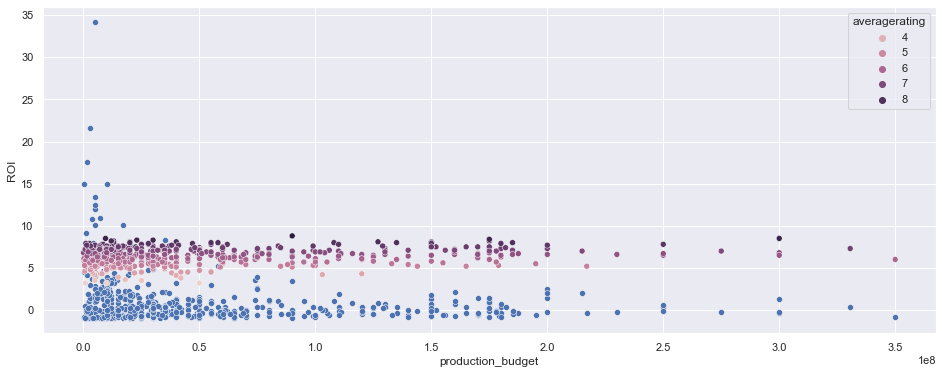

In [29]:
sns.set_theme()

# Load the penguins dataset

# Plot sepal width as a function of sepal_length across days
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x="production_budget", y="ROI",
            data=merged_df3, ax=ax)
sns.scatterplot(x="production_budget", y="averagerating", hue='averagerating',
            data=merged_df3, ax=ax);

In [37]:
merged_df3['genre_list'] = merged_df3['genres'].str.split(',')

In [74]:
merged_df3

,release_date,movie,production_budget,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ROI,genre_list
1737,2015,The Longest Ride,34000000,37446117.0,tt2726560,The Longest Ride,The Longest Ride,2015.0,123.0,"Drama,Romance",7.1,70327.0,0.101356,Drama
1737,2015,The Longest Ride,34000000,37446117.0,tt2726560,The Longest Ride,The Longest Ride,2015.0,123.0,"Drama,Romance",7.1,70327.0,0.101356,Romance
832,2015,Maze Runner: The Scorch Trials,61000000,81697192.0,tt4046784,Maze Runner: The Scorch Trials,Maze Runner: The Scorch Trials,2015.0,131.0,"Action,Sci-Fi,Thriller",6.3,201143.0,0.339298,Action
832,2015,Maze Runner: The Scorch Trials,61000000,81697192.0,tt4046784,Maze Runner: The Scorch Trials,Maze Runner: The Scorch Trials,2015.0,131.0,"Action,Sci-Fi,Thriller",6.3,201143.0,0.339298,Sci-Fi
832,2015,Maze Runner: The Scorch Trials,61000000,81697192.0,tt4046784,Maze Runner: The Scorch Trials,Maze Runner: The Scorch Trials,2015.0,131.0,"Action,Sci-Fi,Thriller",6.3,201143.0,0.339298,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2019,Shazam!,85000000,139606856.0,tt0448115,Shazam!,Shazam!,2019.0,132.0,"Action,Adventure,Comedy",7.4,109051.0,0.642434,Action
497,2019,Shazam!,85000000,139606856.0,tt0448115,Shazam!,Shazam!,2019.0,132.0,"Action,Adventure,Comedy",7.4,109051.0,0.642434,Adventure
497,2019,Shazam!,85000000,139606856.0,tt0448115,Shazam!,Shazam!,2019.0,132.0,"Action,Adventure,Comedy",7.4,109051.0,0.642434,Comedy
3979,2019,Unplanned,6000000,18107621.0,tt9024106,Unplanned,Unplanned,2019.0,106.0,"Biography,Drama",6.3,5945.0,2.017937,Biography


In [56]:
merged_df3=merged_df3.explode('genre_list')

In [68]:
merged_df3.groupby('genre_list').median()[['averagerating','ROI']].sort_values('averagerating', ascending=False)

,averagerating,ROI
genre_list,,
None,7.60,-0.688640
Musical,7.40,1.612783
History,7.20,0.020562
Biography,7.10,-0.055732
Sport,7.10,-0.013376
Western,6.90,0.038141
Drama,6.80,0.109479
Family,6.65,0.137865
Animation,6.60,0.238052


In [69]:
merged_df3.groupby('genre_list').median()[['averagerating','ROI']].sort_values('ROI', ascending=False)

,averagerating,ROI
genre_list,,
Horror,5.80,1.659426
Musical,7.40,1.612783
Mystery,6.20,1.472696
Romance,6.40,0.420993
Comedy,6.30,0.386170
Music,6.55,0.382943
Animation,6.60,0.238052
Family,6.65,0.137865
Documentary,6.60,0.111447


In [84]:
merged_df3['genre_list'].value_counts()

Drama          274
Comedy         183
Action         174
Adventure      156
Thriller        87
Crime           84
Biography       75
Horror          71
Sci-Fi          58
Mystery         51
Romance         49
Fantasy         47
Animation       46
Family          30
History         25
Music           18
Sport           15
Documentary      8
War              6
Musical          2
None             1
Western          1
Name: genre_list, dtype: int64

<AxesSubplot:xlabel='production_budget', ylabel='ROI'>

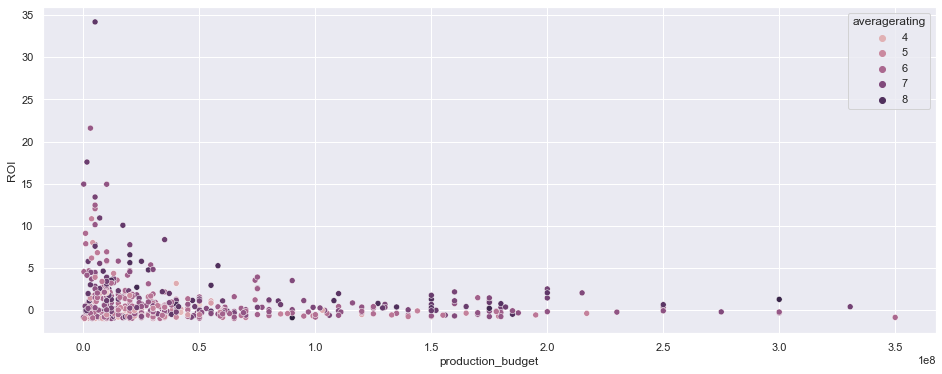

In [50]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x="production_budget", y="ROI", hue='averagerating',
            data=merged_df3, ax=ax)
# sns.scatterplot(x="production_budget", y="averagerating", hue='averagerating',
#             data=merged_df3, ax=ax);

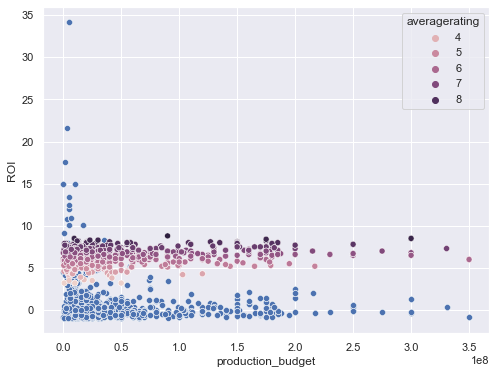

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x="production_budget", y="ROI",
            data=merged_df3, ax=ax)
sns.scatterplot(x="production_budget", y="averagerating", hue='averagerating',
            data=merged_df3, ax=ax);

In [75]:
runtime_df = merged_df3[merged_df3['runtime_minutes'].notna()]

<AxesSubplot:xlabel='runtime_minutes', ylabel='ROI'>

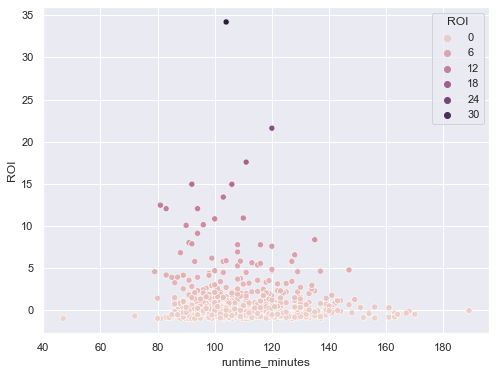

In [80]:
fig, ax = plt.subplots(figsize=(8,6))
# sns.scatterplot(x="runtime_minutes", y="ROI",
#             data=runtime_df, ax=ax)
sns.scatterplot(x="runtime_minutes", y="ROI", hue='ROI',
            data=runtime_df, ax=ax)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [35]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [36]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***